# Laboratorio 4: AG TSP incompleto con mutaciones
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Funciones previas](#id1)
1. [Selección elitista](#id2)
1. [Algoritmo genético y sus resultados](#id3)

---

### Importar Librerías y lectura del excel

---

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import copy


### Leer primera hoja

In [2]:
# Lee el archivo .xlsx y almacénalo en un dataframe de pandas
df_municipios = pd.read_excel('Datos_TSPincompleto.xlsx', skiprows= 8)
df_municipios = df_municipios.reset_index(drop=True)
df_municipios.index += 1
df_municipios.fillna(0, inplace=True)
df_municipios = df_municipios.drop("Municipio", axis=1)
df_municipios


Acebeda, La    Ajalvir  Alameda del Valle  Álamo, El  Alcalá de Henares  \
1      0.000000  62.516331          26.264778  99.971490          70.704896   
2     62.516331   0.000000          52.463610  54.869971          11.546076   
3     26.264778  52.463610           0.000000  77.338396          63.187187   
4     99.971490  54.869971          77.338396   0.000000          60.123913   
5     70.704896  11.546076          63.187187  60.123913           0.000000   
6     59.893857  13.696513          44.533990  45.994031          24.682433   
7     83.659459  35.932989          63.147661  19.081183          42.107291   
8     97.704173  65.580109          72.548937  20.935976          73.405575   
9     55.499515   7.017248          46.133604  58.291772          17.067532   
10    58.187364  47.951136          32.527320  47.643922          59.240475   
11    92.075278  34.120498          86.086486  69.651465          22.916599   
12    75.232844  19.541168          69.883480  66.640468           8.229989   
13   117.074127  56.699877         100.408631  39.643584          53.900784   
14    88.637838  26.150381          76.592485  47.609771          21.035861   
15    94.256089  47.580532          72.443086   7.302460          52.884858   
16    21.306401  44.365935          31.379518  89.607392          51.033520   
17   100.584416  51.945053          78.953274   6.379753          56.184931   
18    51.322819  47.505181          25.539017  53.938859          59.014795   
19   108.506880  46.055574          96.961411  56.462074          38.665489   
20    22.747739  39.798698          24.017210  81.507351          48.068256   

    Alcobendas   Alcorcón  Aldea del Fresno     Algete  Alpedrete     Ambite  \
1    59.893857  83.659459         97.704173  55.499515  58.187364  92.075278   
2    13.696513  35.932989         65.580109   7.017248  47.951136  34.120498   
3    44.533990  63.147661         72.548937  46.133604  32.527320  86.086486   
4    45.994031  19.081183         20.935976  58.291772  47.643922  69.651465   
5    24.682433  42.107291         73.405575  17.067532  59.240475  22.916599   
6     0.000000  27.104240         53.692884  13.335301  34.592556  45.945477   
7    27.104240   0.000000         31.991766  39.211725  38.132873  54.998752   
8    53.692884  31.991766          0.000000  67.011721  40.098662  86.845284   
9    13.335301  39.211725         67.011721   0.000000  45.006899  39.983560   
10   34.592556  38.132873         40.098662  45.006899   0.000000  80.199617   
11   45.945477  54.998752         86.845284  39.983560  80.199617   0.000000   
12   32.891236  49.226195         80.883880  24.232706  67.415606  16.856736   
13   57.275553  40.063532         60.554871  63.245002  78.169398  48.743486   
14   32.335623  33.573484         65.091387  33.155426  63.544433  22.044506   
15   38.990335  11.919776         24.911911  51.101194  44.259217  63.145827   
16   45.250368  71.577943         91.685882  37.554054  55.686625  71.489334   
17   44.398013  17.420310         27.261577  55.992445  50.665793  64.261134   
18   34.862494  42.957395         47.098622  43.635503   7.003471  80.805240   
19   52.600209  47.980475         76.526526  53.062017  82.260940  25.500690   
20   38.369863  63.889038         82.803581  32.786348  46.543618  69.836046   

     Anchuelo    Aranjuez  Arganda del Rey  Arroyomolinos  Atazar, El  \
1   75.232844  117.074127        88.637838      94.256089   21.306401   
2   19.541168   56.699877        26.150381      47.580532   44.365935   
3   69.883480  100.408631        76.592485      72.443086   31.379518   
4   66.640468   39.643584        47.609771       7.302460   89.607392   
5    8.229989   53.900784        21.035861      52.884858   51.033520   
6   32.891236   57.275553        32.335623      38.990335   45.250368   
7   49.226195   40.063532        33.573484      11.919776   71.577943   
8   80.883880   60.554871        65.091387      24.911911   91.685882   
9   24

### Leer segunda hoja

In [3]:
# Lee el archivo .xlsx y almacénalo en un dataframe de pandas
# Carga el archivo Excel
df_poblacion = pd.read_excel('Datos_TSPincompleto.xlsx', skiprows= 4, sheet_name=1)
df_poblacion = df_poblacion.reset_index(drop=True)
df_poblacion.index += 1
df_poblacion.fillna(0, inplace=True)
df_poblacion = df_poblacion.rename(columns={"Unnamed: 0": "Municipio"})
df_poblacion


Municipio   Total
1            Acebeda (La)      62
2                 Ajalvir    4751
3       Alameda del Valle     241
4              Álamo (El)   10123
5       Alcalá de Henares  196888
6              Alcobendas  117041
7                Alcorcón  170296
8        Aldea del Fresno    3227
9                  Algete   20767
10              Alpedrete   15006
11                 Ambite     648
12               Anchuelo    1354
13               Aranjuez   59762
14        Arganda del Rey   57553
15          Arroyomolinos   34833
16          Atazar (El)       107
17                 Batres    1823
18  Becerril de la Sierra    6197
19       Belmonte de Tajo    1769
20          Berrueco (El)     801

<div id='id0'/>

## *1- Introducción*
---
Desarrollar  de  forma  autónoma  un algoritmo  genético  que  permita optimizar  una  función  o  problema a partir  de  una  población  de  individuos  generadas  aleatoriamente  a  los  que  se  le  aplica  un  mecanismo evolutivo (selección + operador genético) definido por unos parámetros.

Debes de usar comentarios con profusión, incluyendo celdas específicas donde expliques los algoritmos que usas  y  el  código  que  has  programado.  Cuantos  más  comentarios  haya,  mejor  será  la  evaluación  y, probablemente, menos preguntas serán necesarias en la defensa de la práctica.

---

<div id='id1'/>

## *2- Funciones previas*

---

### Parámetros

In [4]:
# Asociar cada municipio con un número del 1 al L
municipios = df_municipios.index + 1
L = len(municipios)  # Número total de municipios
E = 12  # Número de estaciones de metro
cromosoma = np.random.randint(1, L+1, size=E)
NPOB = 100       # Número de individuos de la población
NGEN = 100       # Número de generaciones
#Pc = 0.6       # Probabilidad de cambiar-estación, aplicable a cada gen
#Pi = 0.4        # Probabilidad de intercambiar-estación, aplicable a cada gen
NRES = 10       # Cada qué número de generaciones se saca un resumen de la evolución del proceso
NSAMPLE = 10    # Cada qué número de generaciones se saca un muestreo de la población
L = len(df_municipios)  # Número de lugares potenciales para construir estaciones
ALPHA = 0.5  # Valor de alpha para el cálculo de aptitud
P_elite = 0.2

### Función "Cambio de estación"

In [5]:
def cambiar_estacion(cromosoma, i):
    """
    Cambia una estación del cromosoma por otra al azar que no esté en la solución.
    
    :param cromosoma: Lista que representa el cromosoma actual.
    :return: El cromosoma modificado.
    """
    rand = 0

    # Ejecutar al menos una vez
    while True:
        # Hacer algo
        rand = random.randint(1, L)
        # Verificar condición de salida
        if rand not in cromosoma:
            break
        
    cromosoma[i] = rand

    return cromosoma

### Función "Intercambio de estación"

In [6]:
def intercambiar_estacion(cromosoma, i):
    """
    Intercambia dos estaciones dentro del recorrido.
    
    :param cromosoma: Lista que representa el cromosoma actual.
    :return: El cromosoma modificado.
    """
    j = random.randint(0, len(cromosoma) - 1)
    while j == i:
        j = random.randint(0, len(cromosoma) - 1)
        
    cromosoma[i], cromosoma[j] = cromosoma[j], cromosoma[i]
    return cromosoma

### Generación de Población

In [7]:
def initial_population(nPob, E, L):
    population = []
    for i in range(nPob):
        individual = []
        used_stations = []
        for j in range(E):
            station = random.randint(1, L)
            while station in used_stations:
                station = random.randint(1, L)
            individual.append(station)
            used_stations.append(station)
        population.append(individual)
    return population

### Función de mutación

In [8]:
def mutacion(cromosoma, PC, PI):
    """
    Mutación por cambio de estación o intercambio de estación.
    
    :param cromosoma: Lista que representa el cromosoma actual.
    :param tasa_mutacion: Probabilidad de que un gen mute.
    :param l: Número total de estaciones.
    :return: El cromosoma mutado.
    """
    for i in range(len(cromosoma)-1):
        if random.random() < PC:
                cromosoma = cambiar_estacion(cromosoma, i)
        elif random.random() < PI:
                cromosoma = intercambiar_estacion(cromosoma, i)     
    return cromosoma

### Función de Cruce

In [9]:
def cruce(padre1, padre2):
    """
    Realiza el cruce entre dos cromosomas y devuelve el cromosoma hijo resultante.
    
    Parameters:
    padre1 (numpy.ndarray): Primer cromosoma padre.
    padre2 (numpy.ndarray): Segundo cromosoma padre.
    
    Returns:
    numpy.ndarray: Cromosoma hijo resultante del cruce.
    """
    cromosoma_hijo = np.zeros_like(padre1)
    punto_cruce = np.random.randint(1, len(padre1))
    cromosoma_hijo[:punto_cruce] = padre1[:punto_cruce]
    cromosoma_hijo[punto_cruce:] = padre2[punto_cruce:]
    return cromosoma_hijo


### Función Fitness

In [10]:
def fitness(cromosoma, poblacion, distancias, alfa):
    """
    Calcula el valor de fitness de un cromosoma según la fórmula dada.
    
    :param cromosoma: Lista que representa el cromosoma a evaluar.
    :param poblacion: Lista de tuplas que contienen el número potencial de usuarios diarios de cada estación.
    :param distancias: Matriz que contiene las distancias entre cada par de estaciones.
    :param alfa: Valor que permite dar más o menos importancia a cada criterio.
    :return: El valor de fitness del cromosoma.
    """
    f1 = alfa * sum([poblacion[estacion-1][1] for estacion in cromosoma])
    f2 = (1 - alfa) * sum([distancias[cromosoma[i]-2][cromosoma[i+1]-1] for i in range(len(cromosoma)-1)]) + distancias[cromosoma[-1]-2][cromosoma[0]-1]
    return f1 - f2


<div id='id2'/>

## *3- Seleccion Elitista*

---

### -> Seleccionar el 20%

In [11]:
def seleccion20(poblacion, porcentaje_elite, poblacion_original, distancias, alfa):
    # Ordenar la población por fitness (en orden descendente)
    poblacion_ordenada = sorted(poblacion, key=lambda x: fitness(x, poblacion_original, distancias, alfa), reverse=True)    
    # Calcular el número de individuos que deben ser movidos a la población hija
    n_elite = int(len(poblacion_ordenada) * porcentaje_elite)
    
    # Mover los individuos a la población hija y calcular su Ps y Psa
    poblacion_hija = poblacion_ordenada[:n_elite]
    suma_fitness_poblacion_hija = sum([fitness(x, poblacion_original, distancias, alfa) for x in poblacion_hija])
    
    ps_poblacion_hija = [fitness(x, poblacion_original, distancias, alfa)/suma_fitness_poblacion_hija for x in poblacion_hija]
    psa_poblacion_hija = np.cumsum(ps_poblacion_hija)
    
    # Guardar la población restante
    poblacion_restante = poblacion_ordenada[n_elite:]

    fitness_values = [fitness(individual, poblacion_original, distancias, alfa) for individual in poblacion_hija]

    aux = []
    for hijo, fitness_aux in zip(poblacion_hija, fitness_values):
        aux.append((hijo, fitness_aux))
    poblacion_hija = aux
    
    return poblacion_hija, poblacion_restante


### -> Seleccionar el 50%

In [12]:
def seleccion50(poblacion, PC, PI, porcentaje):
    tuplaPoblacion = list(df_poblacion.to_records(index=False))
    tuplaMunicipios = list(df_municipios.to_records(index=False))

    tam_poblacion_hija = int(len(poblacion) * porcentaje)
    poblacion_hija = []
    suma_fitness_poblacion_padre = sum([x[1] for x in poblacion])
    ps_poblacion_padre = [x[1] / suma_fitness_poblacion_padre for x in poblacion]
    psa_poblacion_padre = np.cumsum(ps_poblacion_padre)
    ps_poblacion_padre = [x[1] / suma_fitness_poblacion_padre for x in poblacion]
    psa_poblacion_padre = np.cumsum(ps_poblacion_padre)
    for i in range(tam_poblacion_hija):
        # Seleccionar un cromosoma aplicando el método de la ruleta sobre la Probabilidad de Selección Acumulada (Psa) de los padres     
        aux = copy.deepcopy(poblacion) 
        padre_seleccionado = poblacion[np.searchsorted(psa_poblacion_padre, random.random())]
        # Construir el hijo decidiendo si cada gen se copia fielmente, se cambia-estación o se intercambia-estación usando el método de la ruleta de nuevo sobre Pc, Pi y Pnada
        hijo = mutacion(padre_seleccionado, PC, PI)
        # Calcular el fitness del nuevo individuo
        hijo_fitness = fitness(hijo, tuplaPoblacion, tuplaMunicipios, ALPHA)
        # Copiarlo en la generación hija
        poblacion_hija.append((hijo, hijo_fitness))
        poblacion = aux
        
    return poblacion_hija

### -> Calcular Probabilidad de Selección (Ps) y Probabilidad de Selección Acumulada (Psa) restantes

In [13]:
def seleccion30(poblacion_restante, PC, PI, porcentaje):
    poblacion30 = []
    # Ordenar la población por fitness (en orden descendente)
    poblacion_ordenada = sorted(poblacion_restante, key=lambda x: x[1], reverse=True)

    # Calcular el número de individuos que deben ser seleccionados para la población hija
    n_seleccionados = int(len(poblacion_ordenada) * 0.3)

    # Calcular la suma total de fitness de los cromosomas restantes
    suma_fitness_restantes = sum(cromosoma[1] for cromosoma in poblacion_ordenada)

    # Calcular Ps y Psa de los cromosomas restantes
    ps_psa_restantes = []
    ps_acum = 0
    for i in range(len(poblacion_ordenada)):
        if i < n_seleccionados:
            ps = poblacion_ordenada[i][1] / suma_fitness_restantes
            ps_acum += ps
            ps_psa_restantes.append((poblacion_ordenada[i], ps, ps_acum))
        else:
            break
    
    poblacion30 = seleccion50(poblacion_restante, PC, PI, porcentaje)        
    return ps_psa_restantes, poblacion30

***Se repite el proceso de generar nueva población, para generar el 30% de la generación hija que falta.***

### Selección Elitista

In [14]:
def seleccion_elitista(poblacion, porcentaje_elite, l, PC, PI):
    tuplaPoblacion = list(df_poblacion.to_records(index=False))
    tuplaMunicipios = list(df_municipios.to_records(index=False))
    poblacion_hija20 = []
    poblacion_hija50 = []
    poblacion_restante80 = []
    poblacion30 = []
    PSArestantes = []
    poblacion_hija20, poblacion_restante80 = seleccion20(poblacion, porcentaje_elite, tuplaPoblacion, tuplaMunicipios, ALPHA)
    poblacion_hija20_final = copy.deepcopy(poblacion_hija20) 
    poblacion_hija50 = seleccion50(poblacion, PC, PI, 0.5)
    PSArestantes, poblacion_hija30 = seleccion30(poblacion_restante80,PC, PI, 0.4)

    return poblacion_hija20_final, poblacion_hija50, poblacion_hija30, PSArestantes

### Seleccion de ruleta

In [15]:
def selection_ruleta(population, fitness_values):
    fitness_sum = sum(fitness_values)
    fitness_probabilities = [fitness / fitness_sum for fitness in fitness_values]
    parent1_index = np.random.choice(len(population), p=fitness_probabilities)
    parent2_index = np.random.choice(len(population), p=fitness_probabilities)
    parent1 = population[parent1_index]
    parent2 = population[parent2_index]
    
    return parent1, parent2

<div id='id3'/>

## *4- Algoritmo genético y sus resultados*

---

### Mejor Cromosoma

In [16]:
def mejor_cromosoma(poblacion, poblacion_original, distancias, alfa):
    # Ordenar la población por fitness (en orden descendente)
    poblacion_ordenada = sorted(poblacion, key=lambda x: fitness(x, poblacion_original, distancias, alfa), reverse=True)
    
    # Obtener el mejor cromosoma y su fitness
    mejor_cromosoma = poblacion_ordenada[0]
    mejor_fitness = fitness(mejor_cromosoma, poblacion_original, distancias, alfa)
    
    # Contar cuántos cromosomas tienen el mismo fitness que el mejor
    n_mejores = sum([fitness(cromosoma, poblacion_original, distancias, alfa) == mejor_fitness for cromosoma in poblacion_ordenada])
    
    # Calcular el porcentaje de cromosomas que tienen el mismo fitness que el mejor
    porcentaje_mejores = n_mejores / len(poblacion_ordenada) * 100
    
    return mejor_cromosoma, mejor_fitness, n_mejores, porcentaje_mejores

In [17]:
def nVecesMejorCromosoma(population, cromosoma):
    cont = 0
    for i in population:
        if(cromosoma == population[i]):
            cont += 1
    porcentaje = cont / len(population)
    return cont, porcentaje

### Calcular cromosoma Cosenso

In [18]:
def calcular_cromosoma_consenso_fitness(poblacion, alfa):
    tuplaPoblacion = list(df_poblacion.to_records(index=False))
    tuplaMunicipios = list(df_municipios.to_records(index=False))
    # Obtener el número de estaciones en la población
    num_estaciones = E
    # Crear un array para almacenar el cromosoma consenso
    consenso = [None] * num_estaciones
    # Iterar por cada posición del cromosoma
    for i in range(num_estaciones):
        # Obtener los valores de los genes en esa posición
        genes = [individuo[i] for individuo in poblacion]
        # Eliminar duplicados y ordenar los genes de forma descendente según su frecuencia
        genes_ordenados = sorted(set(genes), key=genes.count, reverse=True)
        # Asignar el gen más frecuente al cromosoma consenso
        consenso[i] = genes_ordenados[0]
        # Eliminar ese gen de la lista de genes para que no se repita en el resto del cromosoma
        genes_ordenados = genes_ordenados[1:]
        # Asignar los demás genes (si los hay) a las posiciones restantes del cromosoma
        for j in range(1, len(genes_ordenados)+1):
            if i+j < num_estaciones:
                consenso[i+j] = genes_ordenados[j-1]
            else:
                break
    # Calcular el valor de fitness del cromosoma consenso
    fitness_consenso = fitness(consenso, tuplaPoblacion, tuplaMunicipios, alfa)
    # Retornar el cromosoma consenso y su valor de fitness
    return consenso, fitness_consenso


### Algoritmo Genético

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.1
Pi = 0.2
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+----------------------------------------------+--------------------+----------------------+---------------------+
|                  Cromosoma                   |         Fi         |         Psi          |         Psai        |
+----------------------------------------------+--------------------+----------------------+---------------------+
|  [9, 14, 11, 15, 20, 17, 7, 1, 6, 5, 13, 8]  | 331528.98077545647 |  0.0570128565566334  |  0.0570128565566334 |
|  [10, 19, 8, 6, 14, 13, 5, 1, 17, 7, 9, 11]  | 322166.25522843166 | 0.055402753791731554 | 0.11241561034836495 |
| [7, 13, 4, 10, 16, 5, 18, 12, 3, 15, 19, 6]  | 306490.38606226415 | 0.052706983189472874 | 0.16512259353783781 |
|  [13, 10, 18, 1, 7, 2, 19, 3, 11, 6, 15, 5]  | 303424.40604254877 | 0.05217972829109061  | 0.21730232182892842 |
| [1

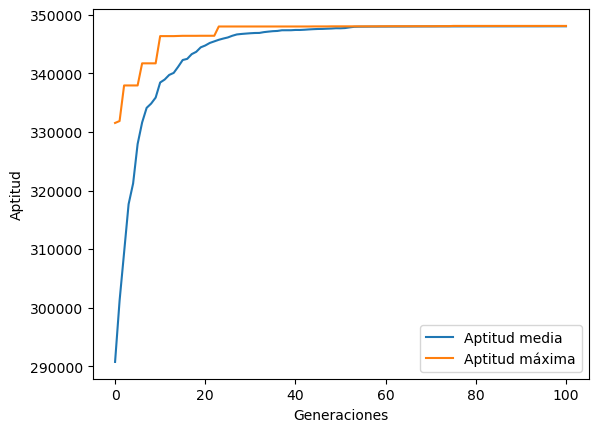

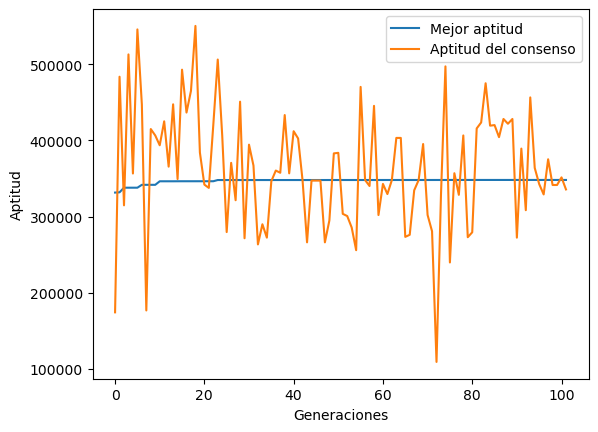

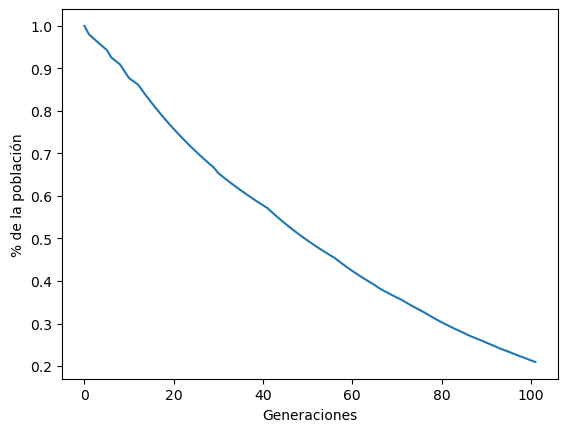

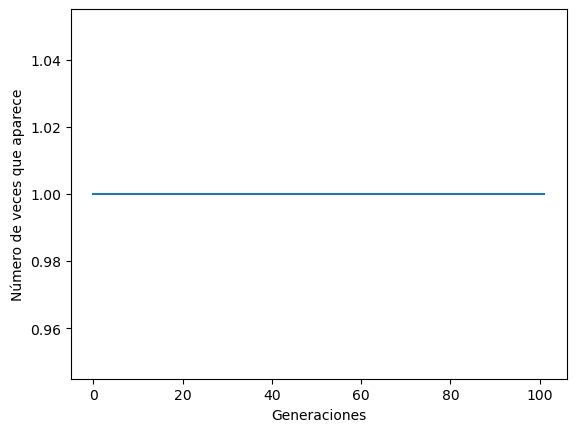

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.1
Pi = 0.6
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+---------------------------------------------+--------------------+----------------------+---------------------+
|                  Cromosoma                  |         Fi         |         Psi          |         Psai        |
+---------------------------------------------+--------------------+----------------------+---------------------+
|  [6, 2, 15, 5, 14, 3, 10, 9, 20, 13, 7, 19] | 339552.83220848074 | 0.05672479307035255  | 0.05672479307035255 |
| [15, 2, 7, 3, 16, 18, 12, 20, 13, 6, 14, 5] | 324647.73084737465 | 0.054234786478735454 |  0.110959579549088  |
| [6, 12, 18, 11, 5, 15, 13, 3, 1, 17, 14, 7] | 323060.58603029454 | 0.05396964228678162  |  0.1649292218358696 |
|  [7, 3, 14, 18, 6, 17, 4, 11, 10, 5, 13, 8] | 319118.8757145077  | 0.05331115064484179  |  0.2182403724807114 |
|  [3, 9, 2

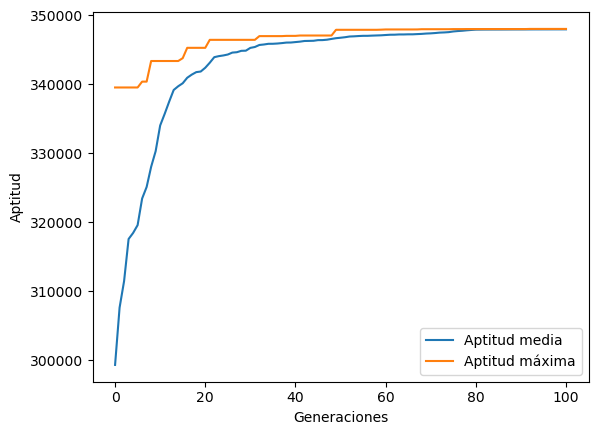

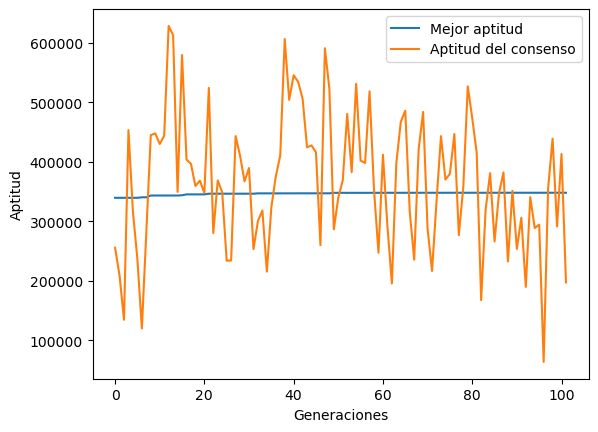

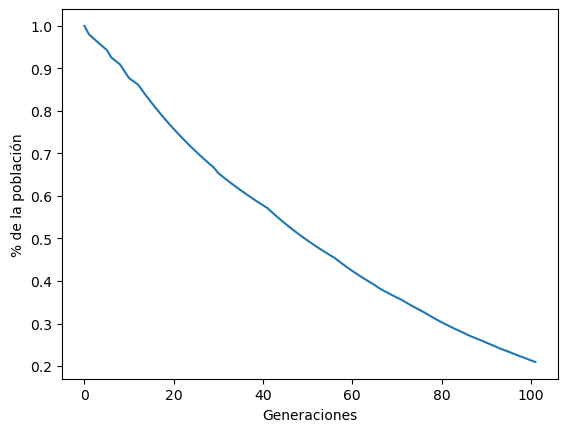

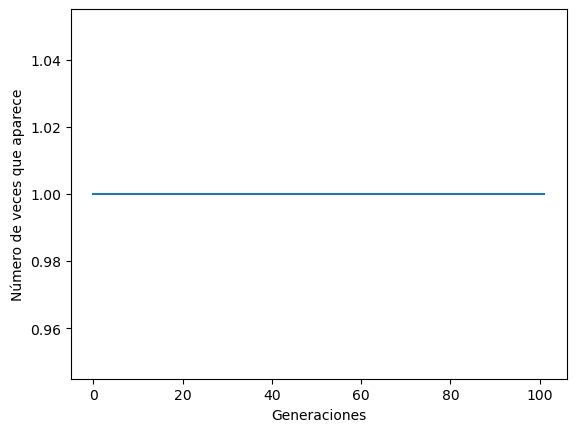

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.1
Pi = 0.75
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+----------------------------------------------+--------------------+----------------------+---------------------+
|                  Cromosoma                   |         Fi         |         Psi          |         Psai        |
+----------------------------------------------+--------------------+----------------------+---------------------+
|  [20, 19, 13, 1, 4, 10, 6, 14, 15, 7, 9, 5]  | 342136.87711984117 | 0.05658349048030297  | 0.05658349048030297 |
|  [5, 2, 6, 15, 17, 13, 8, 7, 10, 16, 9, 14]  | 340683.16282234073 | 0.056343071412337714 | 0.11292656189264069 |
|  [7, 15, 2, 6, 5, 8, 14, 13, 12, 17, 4, 16]  | 328684.6841857923  | 0.05435873167256902  | 0.16728529356520971 |
| [17, 13, 11, 14, 4, 5, 18, 7, 9, 12, 16, 6]  | 320943.31244503055 | 0.053078443391792886 |  0.2203637369570026 |
|  

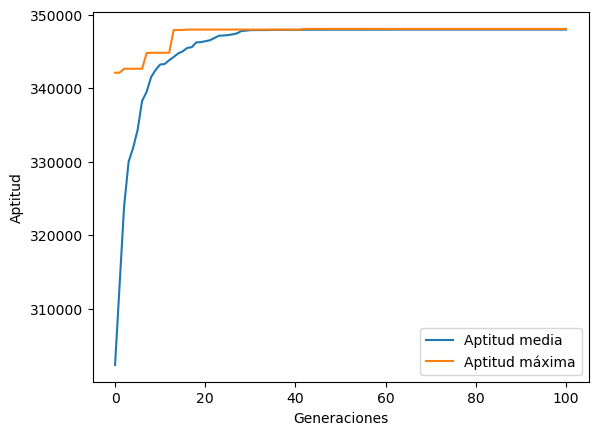

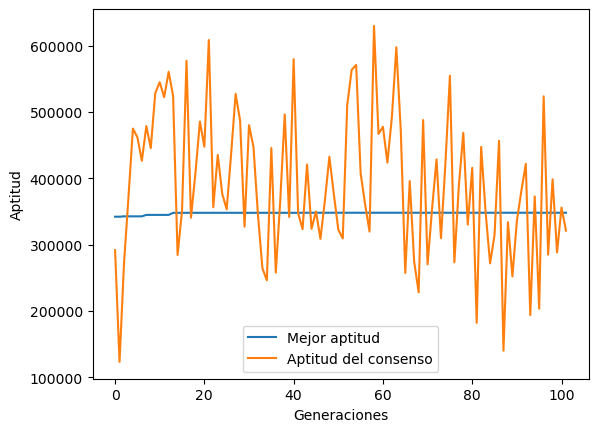

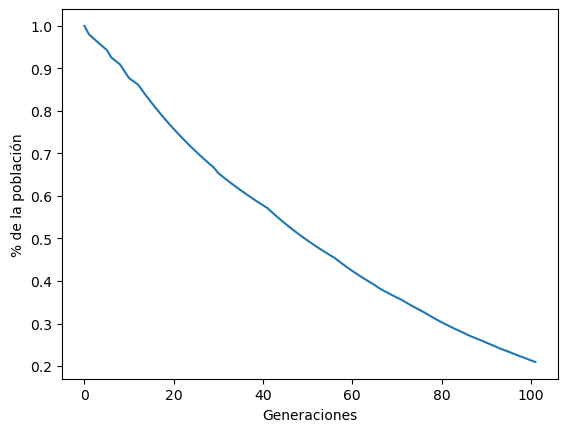

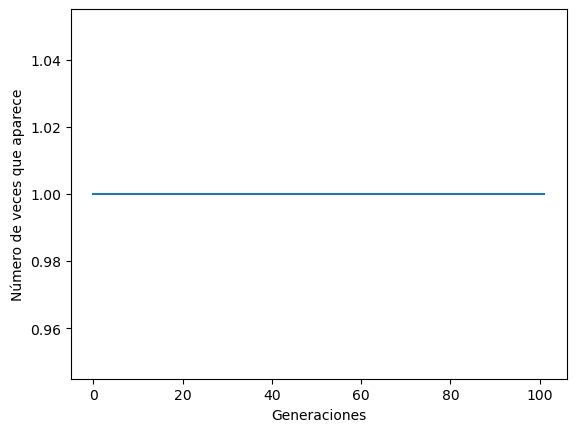

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.5
Pi = 0.2
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+----------------------------------------------+--------------------+----------------------+---------------------+
|                  Cromosoma                   |         Fi         |         Psi          |         Psai        |
+----------------------------------------------+--------------------+----------------------+---------------------+
|  [17, 4, 15, 5, 2, 6, 19, 7, 10, 14, 13, 9]  | 345043.0115532723  | 0.05760717942688059  | 0.05760717942688059 |
| [5, 19, 13, 10, 15, 9, 3, 16, 12, 14, 7, 6]  | 337543.8220655179  | 0.05635514086962221  |  0.1139623202965028 |
| [4, 14, 16, 5, 19, 20, 15, 10, 7, 13, 6, 8]  | 333361.21508803143 | 0.055656827376647774 | 0.16961914767315056 |
|  [6, 14, 7, 16, 5, 2, 15, 9, 17, 10, 4, 20]  | 314688.5131473421  | 0.05253929809750202  | 0.22215844577065258 |
| [1

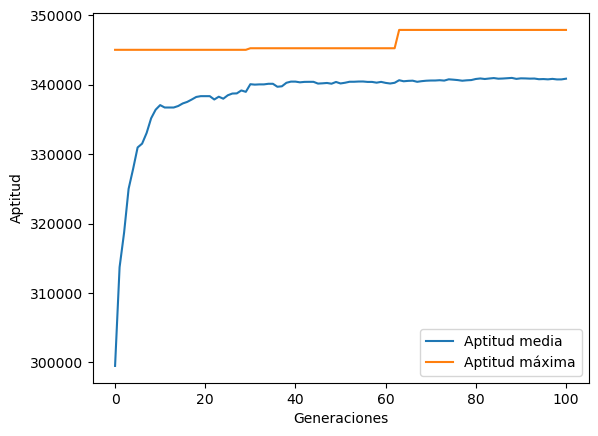

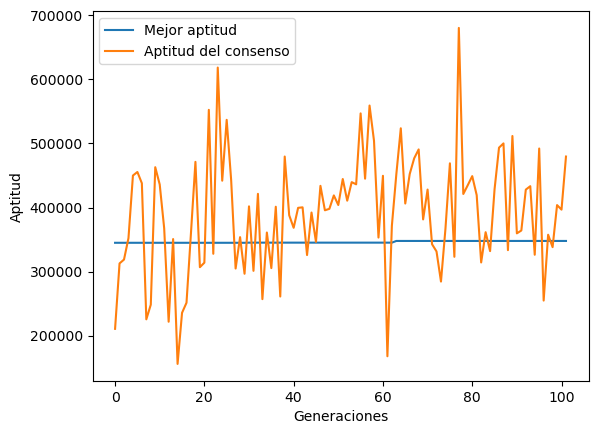

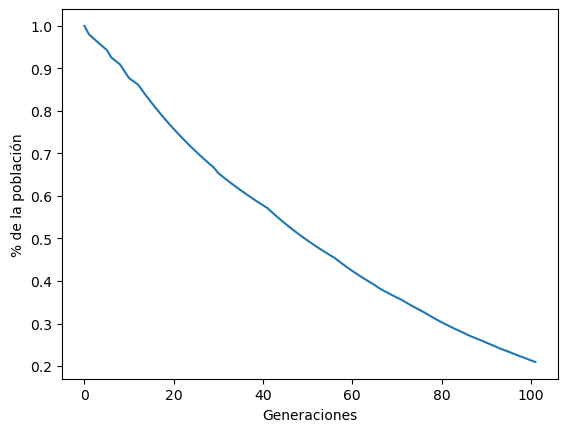

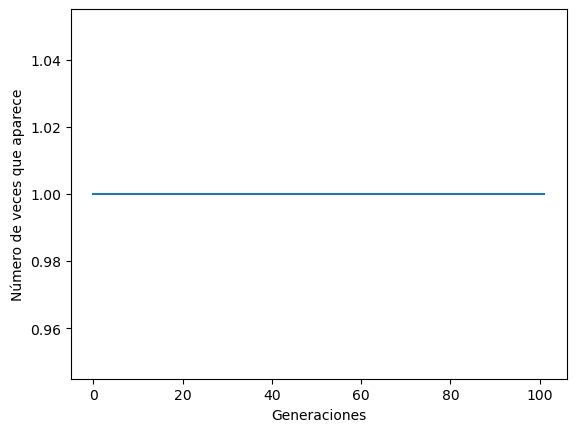

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.5
Pi = 0.6
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+-----------------------------------------------+--------------------+----------------------+---------------------+
|                   Cromosoma                   |         Fi         |         Psi          |         Psai        |
+-----------------------------------------------+--------------------+----------------------+---------------------+
|   [18, 14, 20, 4, 7, 5, 17, 3, 15, 6, 13, 8]  | 329082.5160368477  | 0.05342761155471581  | 0.05342761155471581 |
|   [11, 8, 5, 13, 19, 15, 7, 6, 1, 4, 14, 18]  | 328858.0724444353  | 0.053391172411075584 | 0.10681878396579139 |
|   [14, 19, 15, 11, 4, 6, 5, 7, 3, 13, 1, 8]   | 325954.0014581039  | 0.05291968708741389  | 0.15973847105320527 |
|  [9, 13, 14, 11, 20, 4, 6, 7, 10, 12, 16, 5]  | 324862.0067847599  | 0.052742398217953845 |  0.2124808692711591

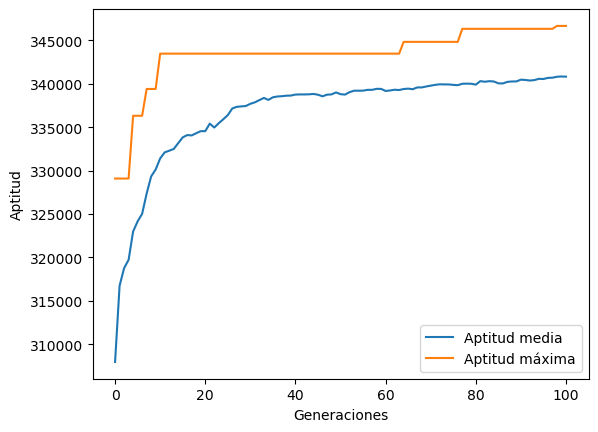

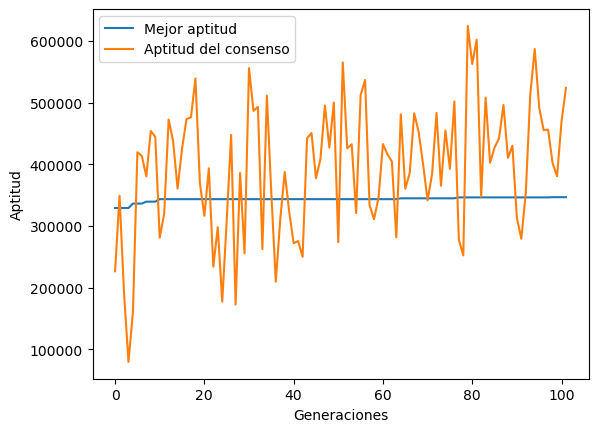

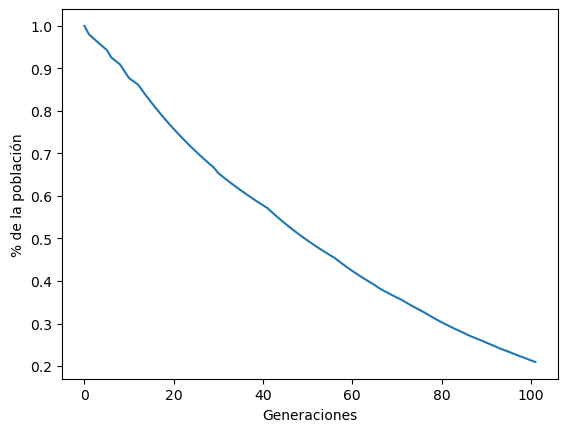

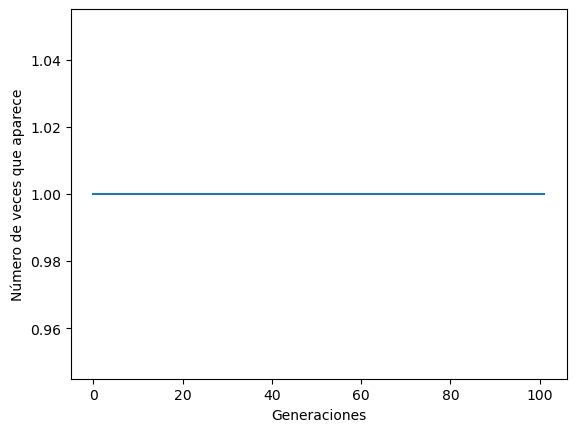

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.5
Pi = 0.75
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+----------------------------------------------+--------------------+----------------------+---------------------+
|                  Cromosoma                   |         Fi         |         Psi          |         Psai        |
+----------------------------------------------+--------------------+----------------------+---------------------+
| [5, 7, 11, 6, 17, 18, 14, 8, 15, 9, 13, 20]  | 334645.7564733262  | 0.05565583355754162  | 0.05565583355754162 |
| [17, 19, 15, 14, 13, 18, 7, 10, 16, 5, 8, 6] | 331996.2390311262  | 0.05521518520351822  | 0.11087101876105984 |
| [13, 10, 20, 12, 3, 6, 15, 16, 19, 7, 14, 5] | 327515.2005593188  | 0.05446993167339694  |  0.1653409504344568 |
| [12, 11, 16, 20, 6, 3, 15, 14, 8, 7, 13, 5]  | 321098.7090697096  | 0.05340278775938906  | 0.21874373819384585 |
|  

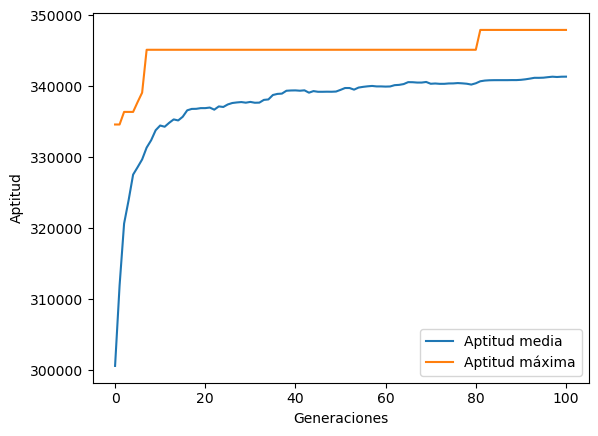

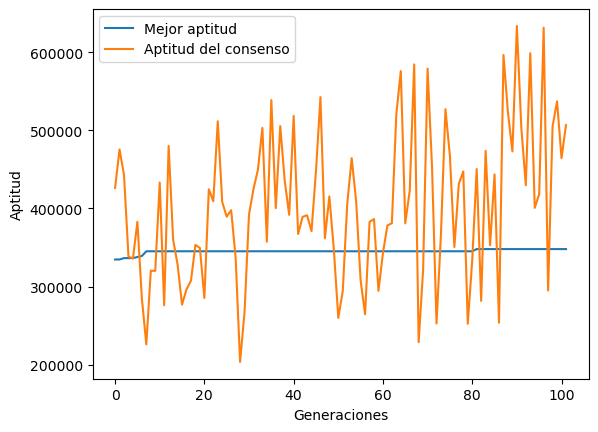

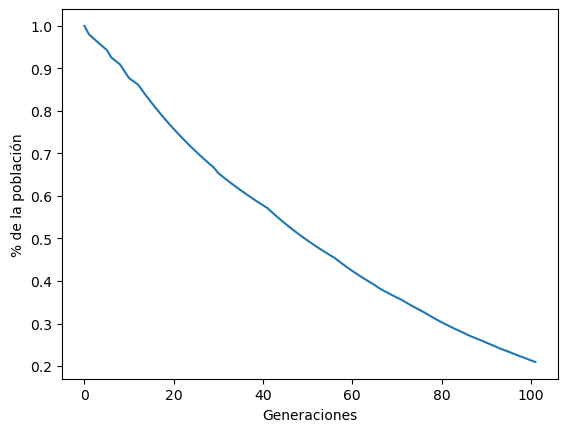

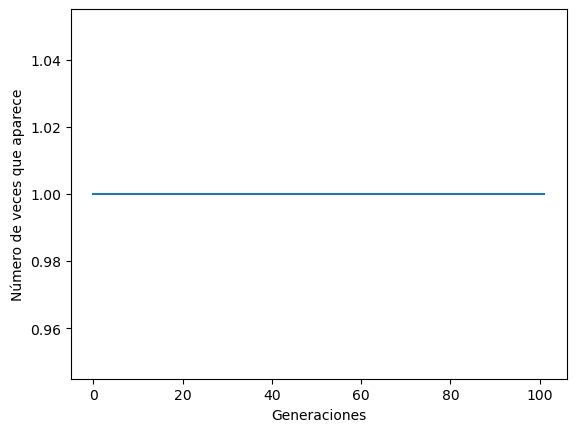

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.8
Pi = 0.2
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+----------------------------------------------+--------------------+----------------------+---------------------+
|                  Cromosoma                   |         Fi         |         Psi          |         Psai        |
+----------------------------------------------+--------------------+----------------------+---------------------+
|  [14, 16, 6, 20, 15, 19, 13, 9, 4, 5, 7, 1]  | 334670.1595005894  | 0.05914358070321635  | 0.05914358070321635 |
|  [5, 7, 12, 3, 6, 9, 10, 1, 16, 17, 14, 13]  | 320266.5645403774  | 0.05659814856126214  | 0.11574172926447848 |
| [19, 15, 12, 6, 16, 7, 18, 13, 5, 10, 17, 4] |   307276.5260606   | 0.05430252295092072  |  0.1700442522153992 |
| [13, 9, 5, 19, 6, 16, 18, 3, 17, 7, 15, 12]  | 305212.8443874492  |  0.0539378249934934  |  0.2239820772088926 |
|  [

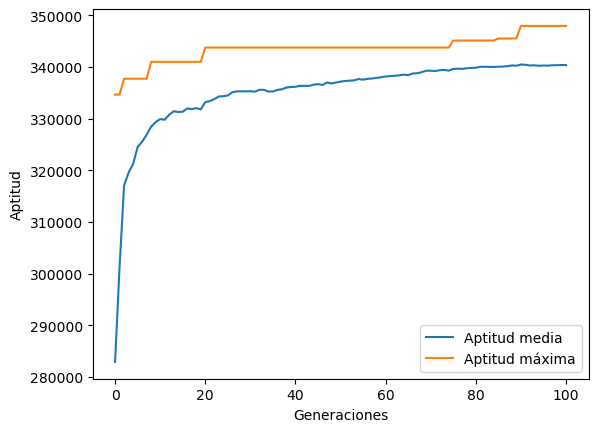

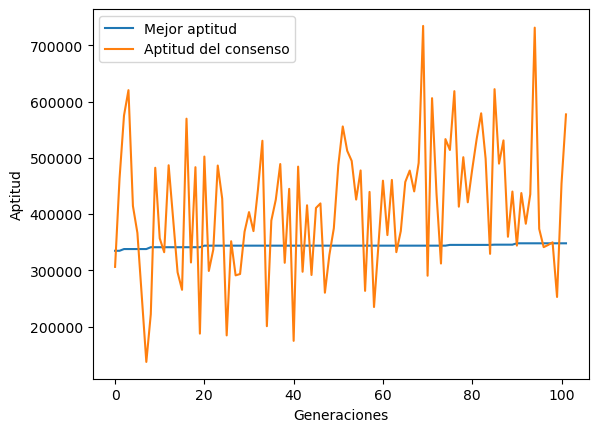

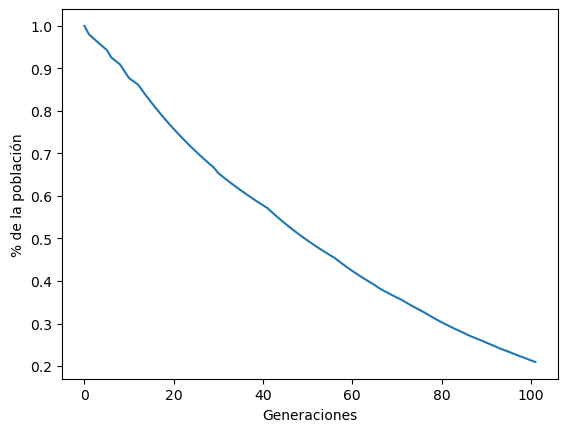

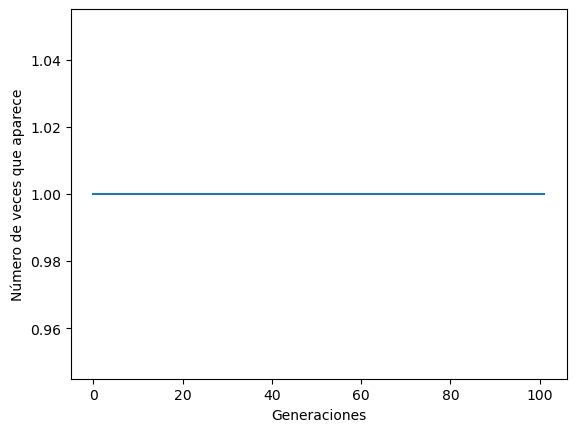

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.8
Pi = 0.6
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+----------------------------------------------+--------------------+----------------------+----------------------+
|                  Cromosoma                   |         Fi         |         Psi          |         Psai         |
+----------------------------------------------+--------------------+----------------------+----------------------+
| [6, 17, 5, 2, 10, 11, 15, 14, 20, 1, 7, 13]  | 329384.50617838104 | 0.057431227990498594 | 0.057431227990498594 |
|  [5, 4, 3, 15, 7, 8, 6, 12, 16, 11, 13, 14]  | 325779.4773204662  | 0.056802657944343755 | 0.11423388593484235  |
|  [15, 4, 18, 2, 8, 13, 10, 6, 11, 5, 7, 17]  | 309969.7768785175  | 0.05404609079102622  | 0.16827997672586859  |
| [13, 17, 5, 15, 6, 18, 11, 4, 19, 7, 9, 16]  | 309805.00690418447 | 0.05401736162561495  | 0.22229733835148352 

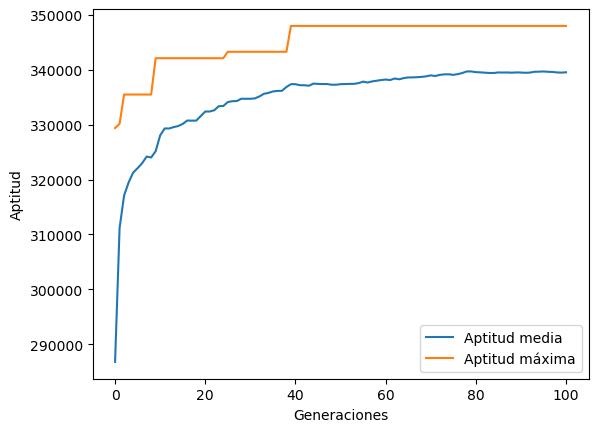

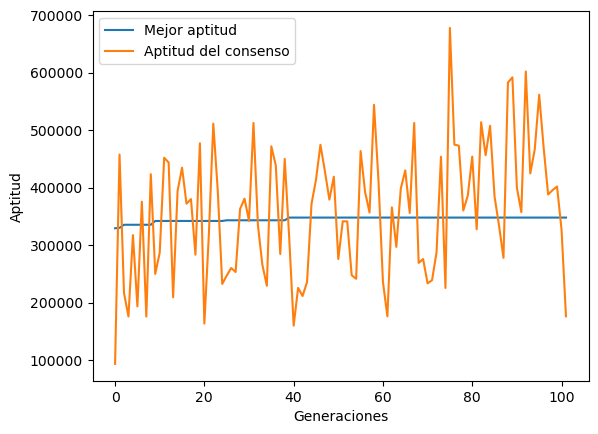

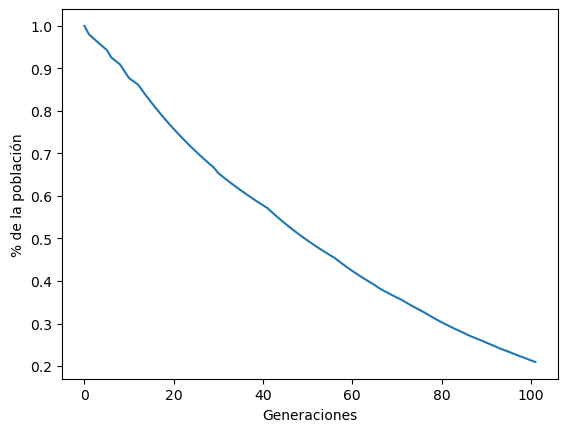

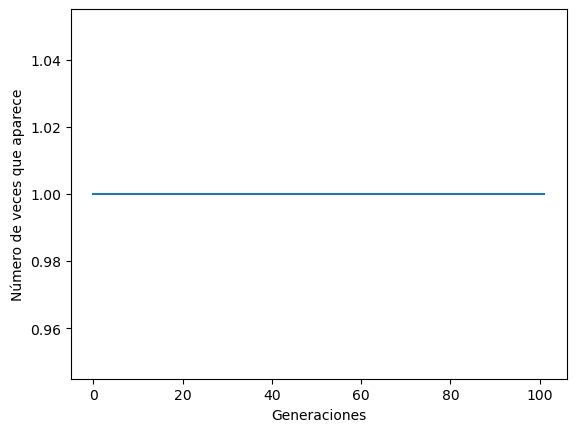

Parámetros utilizados:
L = 20
E = 12
NPOB = 100
NGEN = 100
Pc = 0.8
Pi = 0.75
--------------------------------------------------------------
Tabla de selección de padres para la generación 0:
+---------------------------------------------+--------------------+----------------------+---------------------+
|                  Cromosoma                  |         Fi         |         Psi          |         Psai        |
+---------------------------------------------+--------------------+----------------------+---------------------+
|  [1, 15, 6, 8, 10, 9, 5, 19, 14, 4, 7, 13]  | 343300.9692941909  | 0.05829479296613375  | 0.05829479296613375 |
| [3, 18, 10, 9, 6, 13, 14, 19, 15, 5, 12, 7] | 340585.4789859792  | 0.05783368461084948  | 0.11612847757698322 |
| [7, 14, 16, 8, 13, 5, 15, 6, 20, 9, 10, 19] |  338761.949915089  | 0.057524037219308974 | 0.17365251479629218 |
|  [7, 11, 2, 18, 8, 20, 9, 6, 14, 5, 16, 13] | 318697.1464929315  | 0.05411689985000405  | 0.22776941464629624 |
| [16, 14,

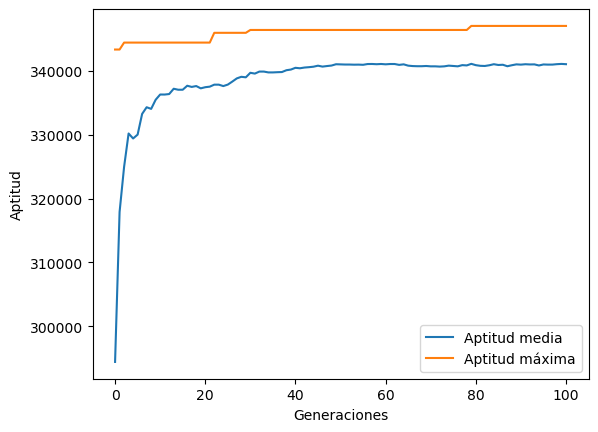

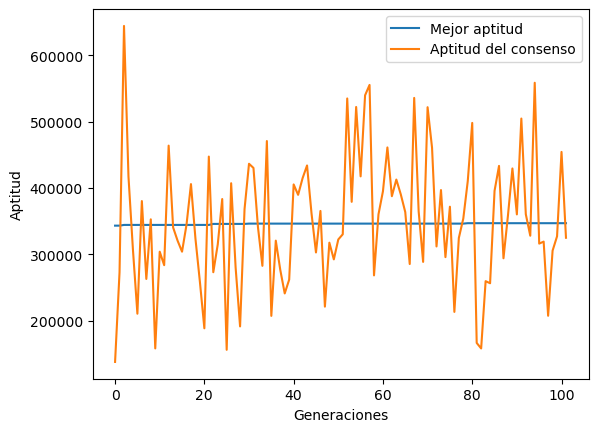

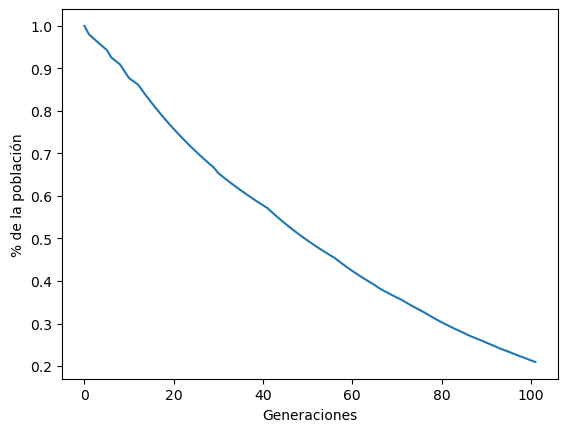

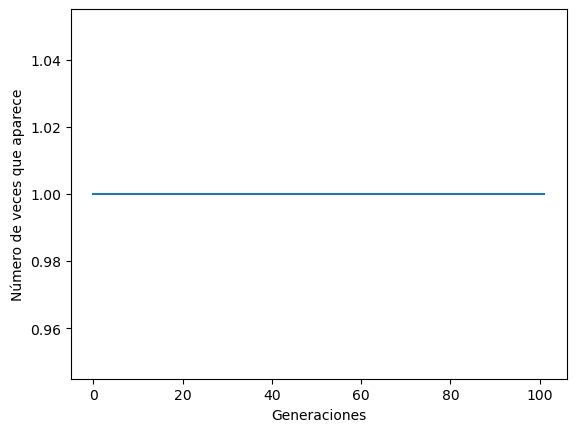

In [19]:

# Definir una tabla auxiliar para mostrar los padres seleccionados
parent_table = PrettyTable()
parent_table.field_names = ["Cromosoma", "Fi", "Psi", "Psai"]

# Definir valores de Pc y Pi a evaluar
Pc_values = [0.1, 0.5, 0.8]
Pi_values = [0.2, 0.6, 0.75]

# Ejecutar el algoritmo genético
# Realizar múltiples ejecuciones para los diferentes valores de Pc y Pi
for PC in Pc_values:
    for PI in Pi_values:
        #PARAMETROS
        print("Parámetros utilizados:")
        print("L =", L)
        print("E =", E)
        print("NPOB =", NPOB)
        print("NGEN =", NGEN)
        print("Pc =", PC)
        print("Pi =", PI)
        # Definir la población inicial y los valores de fitness correspondientes
        population = initial_population(NPOB, E, L)
        tuplaPoblacion = list(df_poblacion.to_records(index=False))
        tuplaMunicipios = list(df_municipios.to_records(index=False))

        fitness_values = [fitness(individual, tuplaPoblacion, tuplaMunicipios, 0.5) for individual in population]

        # Definir listas para el seguimiento de la aptitud media y máxima en cada generación
        mean_fitness = []
        max_fitness = [] 
        best_fitness = 0
        best_solution = None
        consf_list = []
        bestf_list = []
        bestn_list = []
        bestp_list = []

        # Definir variables auxiliares para el seguimiento del proceso
        aux_table = []
        generation = 1
        best_fitness = 0
        best_solution = None
        generation = 0
        #Contadores
        contador_muestra = 0
        muestra_actual = 0
        contador_resumen = 0
        mejor_individuo, mejor_fitness, n_mejores, porcentaje_mejores = mejor_cromosoma(population, tuplaPoblacion, tuplaMunicipios, ALPHA)
        consenso, fitness_consenso = calcular_cromosoma_consenso_fitness(population, ALPHA)


        # Actualización del seguimiento de los mejores resultados
        if mejor_fitness > best_fitness:
                best_fitness = mejor_fitness
                best_solution = mejor_individuo

        bestf_list.append(best_fitness)
        bestn_list.append(n_mejores)
        bestp_list.append(porcentaje_mejores)
        consf_list.append(fitness_consenso)
        
        while generation <= NGEN:
            poblacion_hija20, poblacion_hija50, poblacion_hija30, PSArestantes = seleccion_elitista(population, P_elite, L, PC, PI)
            # juntamos las elites
            poblacion_elite_aux = []
            fitness_ELITE_aux = []
            poblacion_nueva = []
            poblacion_total = []
            poblacion_total_fitness = []
            population = poblacion_nueva
            for poblacion_aux, fitness_elite in poblacion_hija20: 
                poblacion_elite_aux.append(poblacion_aux)
                poblacion_nueva.append(poblacion_aux)
                fitness_ELITE_aux.append(fitness_elite)
                poblacion_total.append(poblacion_aux)
                poblacion_total_fitness.append(fitness_elite)
            
            for poblacion_aux, fitness_elite in poblacion_hija50: 
                poblacion_nueva.append(poblacion_aux)
                poblacion_total.append(poblacion_aux)
                poblacion_total_fitness.append(fitness_elite)
            
            
            for poblacion_aux, fitness_elite in poblacion_hija30: 
                poblacion_nueva.append(poblacion_aux)
                poblacion_total.append(poblacion_aux)
                poblacion_total_fitness.append(fitness_elite)

            # Actualización del seguimiento del proceso
            mean_fitness.append(sum(fitness_ELITE_aux) / len(fitness_ELITE_aux))
            max_fitness.append(max(fitness_ELITE_aux))

            suma = sum(fitness_ELITE_aux)
            ps = [j/suma for j in fitness_ELITE_aux]
            psa = [sum(ps[:i+1]) for i in range(len(poblacion_hija20))]

            # Imprimir información de la tabla cada Nres generaciones
            
            print("--------------------------------------------------------------")
            print(f"Tabla de selección de padres para la generación {generation}:")
            generation += 1
            # Agregar cada fila que contenga los elementos de los arreglos
            
            for i in range(len(poblacion_elite_aux)):
                # Actualización de la tabla auxiliar
                parent_table.add_row([poblacion_elite_aux[i], fitness_ELITE_aux[i], ps[i], psa[i]])
            print(parent_table)

            # Reiniciar la tabla auxiliar
            parent_table = PrettyTable()
            parent_table.field_names = ["Cromosoma", "Fi", "Psi", "Psai"]
            population = poblacion_nueva

            mejor_individuo, mejor_fitness, n_mejores, porcentaje_mejores = mejor_cromosoma(population, tuplaPoblacion, tuplaMunicipios, ALPHA)
            #mejor_individuo, mejor_fitness, n_mejores, porcentaje_mejores = mejor_cromosoma(population, tuplaPoblacion, tuplaMunicipios, ALPHA)
            consenso, fitness_consenso = calcular_cromosoma_consenso_fitness(population, ALPHA)
            # Reiniciar la tabla auxiliar
            parent_table = PrettyTable()
            parent_table.field_names = ["Cromosoma", "Fi", "Psi", "Psai"]

            # Actualización del seguimiento de los mejores resultados
            if mejor_fitness > best_fitness:
                best_fitness = mejor_fitness
                best_solution = mejor_individuo

            bestf_list.append(best_fitness)
            bestn_list.append(n_mejores)
            bestp_list.append(porcentaje_mejores)
            consf_list.append(fitness_consenso)

            if generation % NRES == 0:
                # Imprimir resumen
                print("RESUMEN")
                print("Generación", generation)
                print("Mejor cromosoma:", mejor_individuo)
                print("Fitness:", mejor_fitness)
                print("Número de veces que aparece en la población:", n_mejores)
                print("Porcentaje de la población que representa:", porcentaje_mejores)
                print("Cromosoma consenso:", consenso)
                print("Fitness:", fitness_consenso)
                print("")
                contador_resumen += 1

            if generation % NSAMPLE == 0:
                # Imprimir muestreo
                print("MUESTREO")
                print("Generación", generation)
                muestra = random.sample(population, int(NPOB*0.2))
                for individuo in muestra:
                    print(individuo)
                print("")
                muestra_actual += 1
        # Gráfico de evolución de la aptitud media y máxima
        plt.plot(mean_fitness, label='Aptitud media')
        plt.plot(max_fitness, label='Aptitud máxima')
        plt.xlabel('Generaciones')
        plt.ylabel('Aptitud')
        plt.legend()
        plt.show()

        # Gráfico de evolución de los mejores resultados
        plt.plot(bestf_list, label='Mejor aptitud')
        plt.plot(consf_list, label='Aptitud del consenso')
        plt.xlabel('Generaciones')
        plt.ylabel('Aptitud')
        plt.legend()
        plt.show()

        # Gráfico de evolución del porcentaje de la población que representa el mejor cromosoma
        plt.plot(bestp_list)
        plt.xlabel('Generaciones')
        plt.ylabel('% de la población')
        plt.show()

        # Gráfico de evolución del número de veces que aparece el mejor cromosoma en la población
        plt.plot(bestn_list)
        plt.xlabel('Generaciones')
        plt.ylabel('Número de veces que aparece')
        plt.show()